In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## The Harris-Stephens Corner Detector

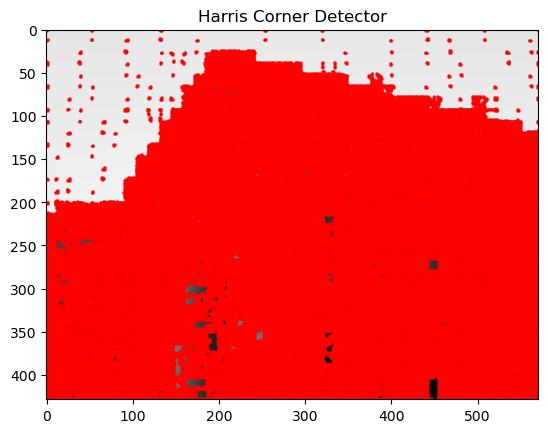

In [9]:
from scipy.ndimage import convolve

def harris_corner_detector(image, threshold=0.01, window_size=3, k=0.04):
    # Compute gradients using Sobel filters
    Ix = convolve(image, np.array([[-1, 0, 1]]), mode='constant')
    Iy = convolve(image, np.array([[-1], [0], [1]]), mode='constant')

    # Compute elements of the structure tensor
    Ix2 = Ix ** 2
    Iy2 = Iy ** 2
    Ixy = Ix * Iy

    # Compute the sum of squared gradients in the window
    Sxx = convolve(Ix2, np.ones((window_size, window_size)), mode='constant')
    Syy = convolve(Iy2, np.ones((window_size, window_size)), mode='constant')
    Sxy = convolve(Ixy, np.ones((window_size, window_size)), mode='constant')

    # Compute the determinant and trace of the structure tensor
    det = Sxx * Syy - Sxy ** 2
    trace = Sxx + Syy

    # Harris response function
    R = det - k * trace ** 2

    # Thresholding to find corners
    corners = np.where(R > threshold * R.max())

    return corners


# Load an example image
image = cv2.imread('../contents/building.png', 0)

# Detect corners
corners = harris_corner_detector(image)

# Plot the original image with corners
plt.imshow(image, cmap='gray')
plt.plot(corners[1], corners[0], 'r.', markersize=1)
plt.title('Harris Corner Detector')
plt.show()

## Using SIFT for image matching